# How many walks does it take for a starting pitcher to get pulled? (Kaggle)


## Starting pitchers tend to get pulled after 2 Walks.

### To do a more in depth study we would need a database of all games played with results and the information of the pitcher, so this analysis only scratches the surface of this very interesting question.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

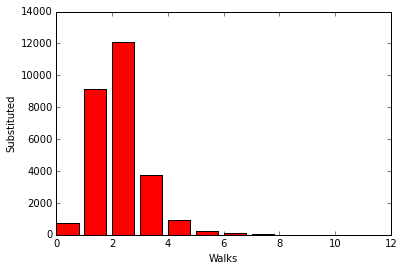

In [2]:
data = pd.read_csv('pitching.csv')

#Selecting only the rows needed. Player ID, Yearn, Number of Games, number of games started, innings and walks
data1 = data[['player_id','year','g','gs','ipouts','bb']]

#Getting rid of pitchers who never started a game.
data2 = data1[data1['gs']>0]

#Function to obtain percentage of games started
data2['percent'] = data['gs']/data['g']

#ipouts contained the number of outs, by dividing it by 3 we get the number of innings.
data2['ipouts']=data2['ipouts']/3

#The games played and the games started now are the same.
data3 = data2[['player_id','year','g','ipouts','bb']]

#This function returns the average amount of innings per gamefor that pitcher in that year.
data3['Ave_Inn'] = data3['ipouts']/data3['g']

#This function returns the average amount of walks in a game for that pitcher in that year.
data3['Ave_Walks']= data3['bb']/data3['g']

#I want to round the average innings and walks to make more understandable.
def Round(row):
    return round(row['Ave_Inn'])

def Round_W(row):
    return round(row['Ave_Walks'])

#rounding up solutions
data3['Ave_Inn'] = data3.apply(lambda row: Round(row),1)

data3['Ave_Walks'] = data3.apply(lambda row: Round_W(row),1)

#We want pitchers that get pull out of the game
data3 = data3[data3['Ave_Inn']<9]

model = data3.groupby(['Ave_Walks'])['player_id'].count().reset_index()

model.columns = ['N_Walks','N_Subs']

x = model['N_Walks']
y = model['N_Subs']

plt.bar(x, y, color = 'red' )

#plt.axis([0, 12,0, 13000])
plt.xlabel('Walks')
plt.ylabel('Substituted')
plt.savefig('model.png')
plt.savefig('model.pdf')
plt.show()

In [3]:
model

,N_Walks,N_Subs
0,0,724
1,1,9174
2,2,12101
3,3,3730
4,4,958
5,5,211
6,6,82
7,7,25
8,8,14
9,9,4
